## Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

## Importing the libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

2.10.1


## Importing the dataset

In [4]:
df = pd.read_csv("Datasets\FakeNews_train.csv")

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df.shape

(20800, 5)

## Data Preprocessing

In [9]:
#Checking for null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
##So, our dataset have many null values max around 1957.
##Since our dataset is very large over 20k columns, dropping might not effect the model
df = df.dropna()

In [12]:
df.shape

(18285, 5)

In [13]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
#So, we have no null values

In [44]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [46]:
## As we can see index is not in order after dropping of columns
## Hence, re-setting the index
df.reset_index(inplace=True)

In [16]:
## Since, ID and author or not useful for our sentiment analysis model. We are not considering them for training

In [47]:
## Calculating maximum size of the sentence in the text column
print(max([len(sent) for sent in df['text']]))

142961


In [48]:
##So, maximum size of a sentence in text column is 142961 which is pretty huge for our model. So,we are not considering it for training the model.

##Our Independent features are
X = df['title'] #So, we are only cinsidering title column

In [49]:
## Get the Dependent features
y = df['label']

In [50]:
X.shape

(18285,)

In [51]:
y.shape

(18285,)

In [52]:
print(max([len(sent) for sent in df['title']]))

456


In [53]:
## Vocabulary size
voc_size=500

In [54]:
messages = X.copy()

In [55]:
messages

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [56]:
messages[6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [38]:
#Importing nltk libraries
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Applying Stemming on the dataset

#### STEMMING:

A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
In simple words, Stemming is the process of reducing a word to its Root word.

EXAMPLES:

actor, actress, acting --> act
eating, eats, eaten --> eat

In [57]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [58]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [59]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

You can also use TF-IDF or Word2vec for converting Words into vectors instead of using below Word Embedding method

### One Hot Encoding the independent features

In [60]:
one_hot_encoding = [one_hot(word,voc_size) for word in corpus]
one_hot_encoding

[[467, 259, 277, 320, 85, 393, 207, 62, 67, 354],
 [340, 58, 117, 475, 23, 481, 123],
 [348, 145, 172, 241],
 [432, 404, 31, 404, 219, 276],
 [15, 23, 226, 301, 496, 351, 23, 476, 481, 62],
 [255, 455, 293, 279, 30, 278, 216, 105, 175, 339, 309, 72, 385, 489, 123],
 [373, 499, 77, 204, 52, 394, 397, 362, 332, 413, 405],
 [78, 465, 235, 105, 56, 127, 278, 420, 332, 413, 405],
 [201, 171, 354, 100, 227, 226, 136, 294, 278, 170],
 [440, 134, 173, 361, 211, 236, 160, 171],
 [433, 418, 237, 70, 469, 496, 366, 55, 248, 90, 482],
 [404, 18, 85, 226, 278, 56],
 [406, 133, 301, 235, 272, 185, 92, 420, 431],
 [234, 39, 467, 80, 170, 122, 121, 332, 413, 405],
 [64, 21, 44, 449, 494, 332, 413, 405],
 [279, 441, 444, 123, 44, 296, 54, 3, 256, 456],
 [316, 429, 58],
 [425, 389, 336, 236, 278, 237, 16, 123],
 [263, 29, 117, 484, 185, 445, 436, 242, 351],
 [406, 203, 278, 198, 366, 123],
 [363, 249, 82, 434, 25, 436, 160, 47, 173, 332, 413, 405],
 [206, 103, 384, 388, 230, 31, 452],
 [385, 97, 496, 49

In [61]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [62]:
one_hot_encoding[1]

[340, 58, 117, 475, 23, 481, 123]

### Embedding Representation
Embedding the dataset - applying padding to the dataset

In [63]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_encoding,padding='post',maxlen=sent_length)

In [64]:
embedded_docs

array([[467, 259, 277, ...,   0,   0,   0],
       [340,  58, 117, ...,   0,   0,   0],
       [348, 145, 172, ...,   0,   0,   0],
       ...,
       [326, 217,  26, ...,   0,   0,   0],
       [478,  56, 171, ...,   0,   0,   0],
       [283, 133, 390, ...,   0,   0,   0]])

In [65]:
embedded_docs[0]

array([467, 259, 277, 320,  85, 393, 207,  62,  67, 354,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

## Model Creation using LSTM

In [66]:
##Creating the model

#Features representation=> number of dimensions for each word in a sentence
embedding_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

## You can also add Dropout layer here for reducing overfitting
# model.add(Dropout(0.3))

## Adding 100 neural networks for the model
model.add(LSTM(100))

# model.add(Dropout(0.3))

# Output will be a either '0' or '1'. So, using sigmoid activation function for output
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            20000     
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 76,501
Trainable params: 76,501
Non-trainable params: 0
_________________________________________________________________


In [68]:
len(embedded_docs)

18285

In [70]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [71]:
X_final

array([[467, 259, 277, ...,   0,   0,   0],
       [340,  58, 117, ...,   0,   0,   0],
       [348, 145, 172, ...,   0,   0,   0],
       ...,
       [326, 217,  26, ...,   0,   0,   0],
       [478,  56, 171, ...,   0,   0,   0],
       [283, 133, 390, ...,   0,   0,   0]])

In [72]:
y_final

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [73]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

## Splitting the dataset into train and test set

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

## Model Training

In [82]:
History = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
383/383 [==============================] - 14s 36ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.4812 - val_accuracy: 0.8896
Epoch 2/10
383/383 [==============================] - 14s 37ms/step - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.4453 - val_accuracy: 0.8838
Epoch 3/10
383/383 [==============================] - 14s 36ms/step - loss: 0.0503 - accuracy: 0.9860 - val_loss: 0.4674 - val_accuracy: 0.8848
Epoch 4/10
383/383 [==============================] - 14s 37ms/step - loss: 0.0491 - accuracy: 0.9863 - val_loss: 0.4724 - val_accuracy: 0.8867
Epoch 5/10
383/383 [==============================] - 13s 33ms/step - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.5523 - val_accuracy: 0.8819
Epoch 6/10
383/383 [==============================] - 14s 36ms/step - loss: 0.0484 - accuracy: 0.9860 - val_loss: 0.4944 - val_accuracy: 0.8858
Epoch 7/10
383/383 [==============================] - 14s 36ms/step - loss: 0.0414 - accuracy: 0.9894 - val_loss: 0.5232 - val_accuracy:

## Performance of the model
Evaluating the model using Performance metrics

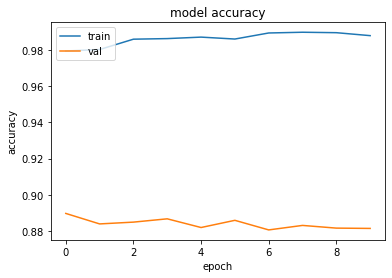

In [83]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

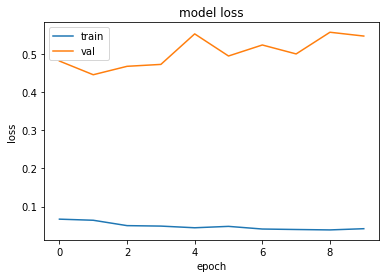

In [84]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [85]:
y_pred = model.predict(X_test)

189/189 [==============================] - 3s 13ms/step


In [88]:
y_pred=np.where(y_pred > 0.5, 1,0) 

In [90]:
accuracy_score(y_test,y_pred)

0.8813587406793704

In [89]:
confusion_matrix(y_test,y_pred)

array([[3039,  380],
       [ 336, 2280]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3419
           1       0.86      0.87      0.86      2616

    accuracy                           0.88      6035
   macro avg       0.88      0.88      0.88      6035
weighted avg       0.88      0.88      0.88      6035

